# **Artificial Neural Networks Project: Street View Housing Number Digit Recognition**

# **Marks: 30**

Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a feed-forward neural network model that can recognize the digits in the images. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [7]:
print(tf.__version__)

2.9.2


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [8]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')


# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [9]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

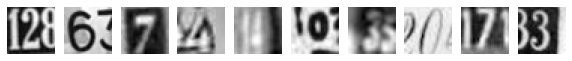

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [11]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [12]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Question 1: Normalize the train and the test data. (2 Marks)**

In [13]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255.0

X_test = X_test/255.0

In [14]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [15]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [16]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Question 2: Build and train an ANN model as per the above mentioned architecture. (10 Marks)**

In [17]:
# Define the model

def nn_model_1():

    model = Sequential() 

    # Add layers as per the architecture mentioned above in the same sequence
    
    model.add(Dense(activation = 'relu', input_dim = 1024, units=64))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(10, activation = 'softmax'))
      
    # Compile the model

    model.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [18]:
# Build the model

model_1 = nn_model_1()

In [19]:
# Print the summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Fit the model

history_model_1 = model_1.fit(X_train, y_train,       
          validation_split=0.2,
          epochs=20,
          batch_size=128,verbose=1)

Epoch 1/20
263/263 [==============================] - 4s 11ms/step - loss: 2.3002 - accuracy: 0.1158 - val_loss: 2.2724 - val_accuracy: 0.1525
Epoch 2/20
263/263 [==============================] - 2s 9ms/step - loss: 2.1415 - accuracy: 0.2150 - val_loss: 1.9769 - val_accuracy: 0.3170
Epoch 3/20
263/263 [==============================] - 2s 9ms/step - loss: 1.8248 - accuracy: 0.3685 - val_loss: 1.6844 - val_accuracy: 0.4274
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 1.6018 - accuracy: 0.4688 - val_loss: 1.5136 - val_accuracy: 0.5038
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4689 - accuracy: 0.5206 - val_loss: 1.4363 - val_accuracy: 0.5243
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3996 - accuracy: 0.5480 - val_loss: 1.3818 - val_accuracy: 0.5523
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3516 - accuracy: 0.5640 - val_loss: 1.3287 - val_accuracy: 0.5729
Epoch

### **Plotting the validation and training accuracies**

### **Question 3: Write your observations on the below plot. (2 Marks)**

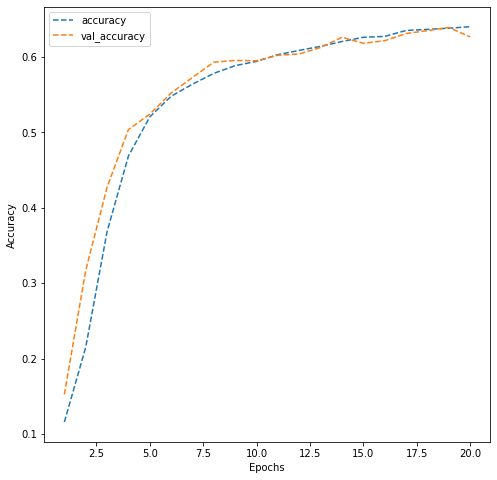

In [21]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
 

*   The training accuracy increases smoothly with increase in epochs, steeply at first but tapers off after 5 epochs but still rises noticiably even out to the limit.
*   The validation accuracy fluctuates somewhat but keeps relitively close to training accuracy. The validation accuracy increases smoothly with increase in epochs, steeply at first but tapers off after 5 epochs but still rises noticiably even out to the limit.
*   The model is giving good accuracy. After 20 epochs, both the accuracy of the model on the training data and the validation accuracy are about 64%. Additional epochs to get better training and validation accuracy could be warrented.
*   The validation accuracy is close to the training accuracy. This indicates that the model is giving a generalized performance


Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [22]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [23]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Question 4: Build and train the new ANN model as per the above mentioned architecture (10 Marks)**

In [24]:
# Define the model

def nn_model_2():

    model = Sequential()  
    
    # Add layers as per the architecture mentioned above in the same sequence
    
    model.add(Dense(activation = 'relu', input_dim = 1024, units=256))

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(BatchNormalization())

    model.add(Dense(10, activation = 'softmax'))
    
    # Compile the model

    model.compile(optimizer=Adam(learning_rate = 0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [25]:
# Build the model

model_2 = nn_model_2()

In [26]:
# Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [27]:
# Fit the model

history_model_2 = model_1.fit(X_train, y_train,       
          validation_split=0.2,
          epochs=30,
          batch_size=128,verbose=1)

Epoch 1/30
263/263 [==============================] - 2s 6ms/step - loss: 1.1465 - accuracy: 0.6425 - val_loss: 1.1486 - val_accuracy: 0.6407
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 1.1386 - accuracy: 0.6463 - val_loss: 1.1450 - val_accuracy: 0.6407
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1399 - accuracy: 0.6453 - val_loss: 1.1326 - val_accuracy: 0.6460
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1317 - accuracy: 0.6469 - val_loss: 1.1607 - val_accuracy: 0.6390
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1228 - accuracy: 0.6498 - val_loss: 1.2001 - val_accuracy: 0.6274
Epoch 6/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1204 - accuracy: 0.6522 - val_loss: 1.1203 - val_accuracy: 0.6540
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1122 - accuracy: 0.6565 - val_loss: 1.1113 - val_accuracy: 0.6560
Epoch 

### **Plotting the validation and training accuracies**

### **Question 5: Write your observations on the below plot. (2 Marks)**

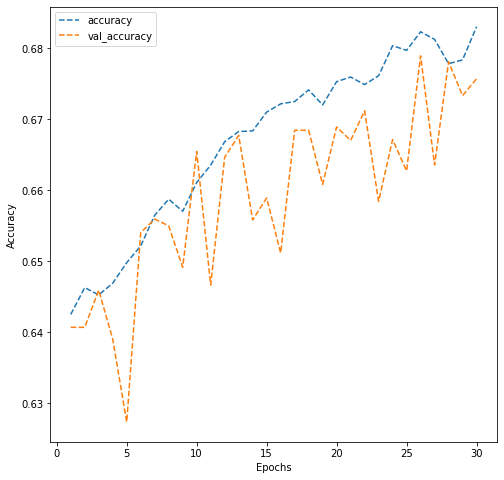

In [28]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**


*   We can see that accuracy keeps increasing for the test data as the number of epochs increased in a fairly consistent manner, tapering off somewhat after 20 epochs. Validation accuracy also generally increases but is consistent.
*   This indicates that the model learns the training data more closely after each epoch and generally replicates the performance on the validation data, which is a sign that the model is no overfitting.
*   The inconsistency in the validation accuracy is a reflection of there being noise in the data. That the validation accuracy still generally increases with epochs means that the model being produced is likely a good one.







## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [29]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [30]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Question 6: Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results. (4 Marks)**

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.04      0.01      0.02      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.00      0.00      0.00      1719
           4       0.11      0.46      0.18      1812
           5       0.00      0.00      0.00      1768
           6       0.10      0.05      0.07      1832
           7       0.11      0.54      0.19      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

    accuracy                           0.11     18000
   macro avg       0.04      0.11      0.04     18000
weighted avg       0.04      0.11      0.05     18000



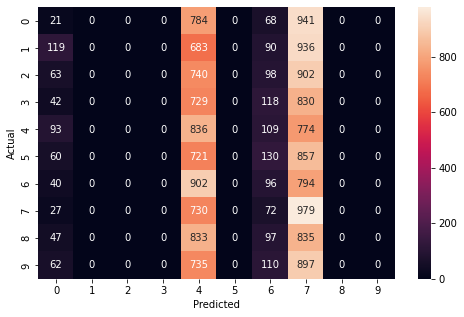

In [32]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**



*   The confusion matrix shows that the model cannot identify the numbers with any good accuracy. All numbers are either idenfied as being a 4 or a 7, with a small chance of being identified as a 6 or a 0, roughly equally regardless of what the acutal number is.

*   The classification report shows that for almost all the metrics the numbers are below 50%, for most much lower, which is bad.

